<a href="https://colab.research.google.com/github/Lyra7417/Anomaly_Detection/blob/master/Autoencoder_MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

num_classes = 10
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


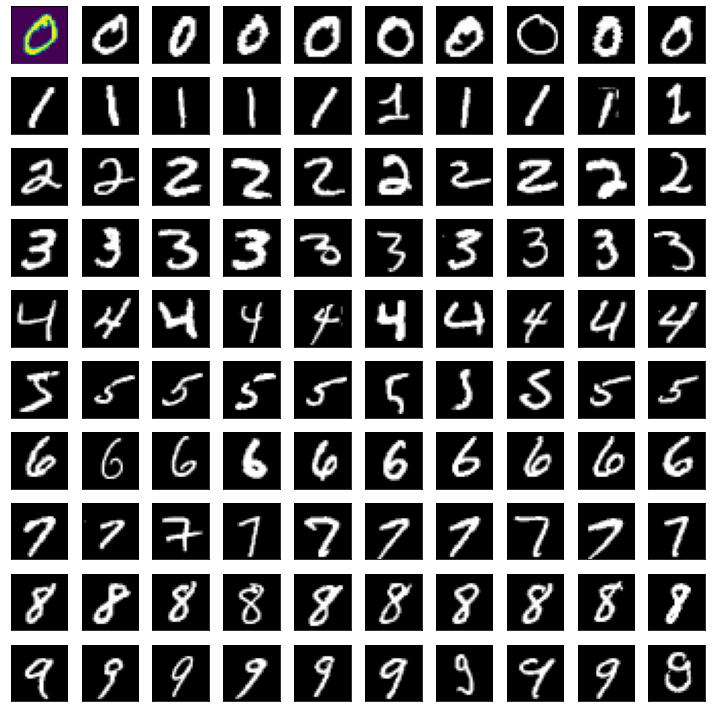

In [3]:
fig, axes = plt.subplots(num_classes, 10, figsize=(10, 10)) # 新建一个包含100张子图的10行10列的画布
for i in range(num_classes): # 对于每一类数字
    indice = np.where(y_train == i)[0] #找到标签为i的图像下标
    for j in range(10): # 输出前10张图片
        axes[i][j].imshow(x_train[indice[j]])
        plt.gray()
        # 去除坐标刻度
        axes[i][j].set_xticks([]) 
        axes[i][j].set_yticks([])
plt.tight_layout()
plt.show()

In [0]:
#归一化
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_normal = [x_train[i] for i in range(len(x_train)) if y_train[i]!=0]
x_anomaly = [x_train[i] for i in range(len(x_train)) if y_train[i]==0]

x_normal = np.array(x_normal)
x_anomaly = np.array(x_anomaly)

x_normal = x_normal.reshape(x_normal.shape[0], -1)
x_anomaly = x_anomaly.reshape(x_anomaly.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [5]:
from keras.layers import Input, Dense
from keras.models import Model

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [6]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               1011

In [7]:
autoencoder.fit(x_normal, x_normal,
                epochs=20,
                batch_size=128,
                shuffle=True)

Epoch 1/20
54077/54077 [==============================] - 5s 91us/step - loss: 0.2961
Epoch 2/20
54077/54077 [==============================] - 5s 88us/step - loss: 0.2345
Epoch 3/20
54077/54077 [==============================] - 5s 88us/step - loss: 0.2091
Epoch 4/20
54077/54077 [==============================] - 5s 88us/step - loss: 0.1940
Epoch 5/20
54077/54077 [==============================] - 5s 88us/step - loss: 0.1785
Epoch 6/20
54077/54077 [==============================] - 5s 88us/step - loss: 0.1671
Epoch 7/20
54077/54077 [==============================] - 5s 87us/step - loss: 0.1592
Epoch 8/20
54077/54077 [==============================] - 5s 89us/step - loss: 0.1533
Epoch 9/20
54077/54077 [==============================] - 5s 88us/step - loss: 0.1485
Epoch 10/20
54077/54077 [==============================] - 5s 88us/step - loss: 0.1437
Epoch 11/20
54077/54077 [==============================] - 5s 89us/step - loss: 0.1395
Epoch 12/20
54077/54077 [===========================

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


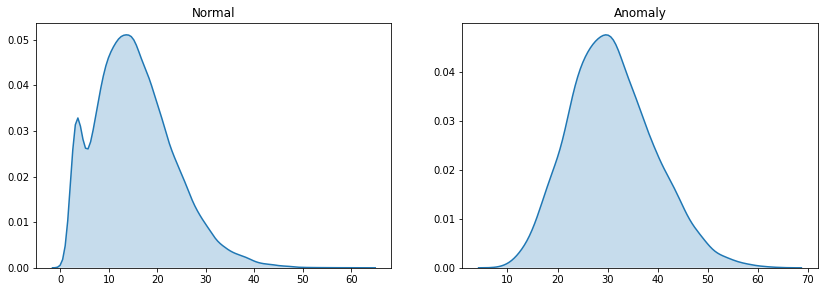

In [8]:
import seaborn as sns

def Reconstruct_error(input_data):
    output_data = autoencoder.predict(input_data)
    
    MSE = np.sum((output_data-input_data)**2, axis=1)
    return MSE

err_normal = Reconstruct_error(x_normal)
err_anomaly = Reconstruct_error(x_anomaly)

plt.figure(figsize = (14,4.5))
plt.subplot(121)
plt.title('Normal')
sns.kdeplot(err_normal,shade=True)
plt.subplot(122)
plt.title('Anomaly')
sns.kdeplot(err_anomaly,shade=True)

In [9]:
y_test_bool = y_test==0

err = Reconstruct_error(x_test)
yhat = err>22

anom_test = yhat[y_test_bool]
anomaly_accuracy = np.sum(anom_test)/len(anom_test)
nom_test = ~yhat[~(y_test_bool)]
normal_accuracy = np.sum(nom_test)/len(nom_test)
print("Normal accuracy:",normal_accuracy)
print("Anomaly accuracy:",anomaly_accuracy)

Normal accuracy: 0.8202882483370288
Anomaly accuracy: 0.8693877551020408


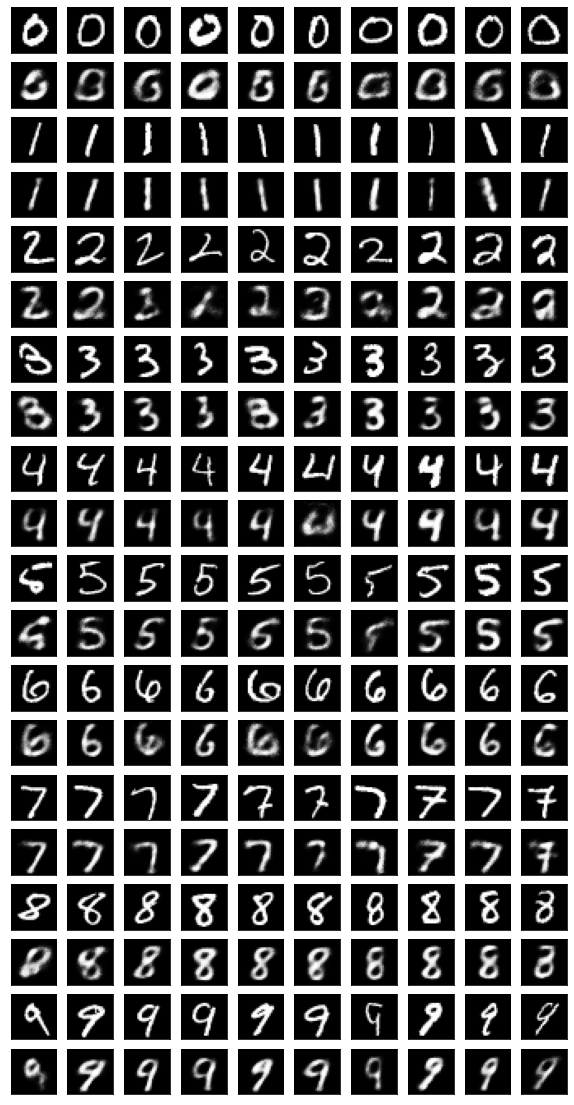

In [10]:
encoded_imgs = autoencoder.predict(x_test)

fig, axes = plt.subplots(20, 10, figsize=(10, 20)) # 新建一个包含200张子图的20行10列的画布
for i in range(10): # 对于每一类数字
    indice = np.where(y_test == i)[0] #找到标签为i的图像下标
    for j in range(10): # 输出前10张图片
        axes[2*i][j].imshow(x_test[indice[j]].reshape(28, 28))
        plt.gray()
        axes[2*i][j].set_xticks([]) 
        axes[2*i][j].set_yticks([])

        axes[2*i+1][j].imshow(encoded_imgs[indice[j]].reshape(28, 28))
        plt.gray()
        axes[2*i+1][j].set_xticks([]) 
        axes[2*i+1][j].set_yticks([])
plt.show()
